# Elec

In [1]:
import pandas as pd
"""
This script performs the following tasks:
1. Imports necessary libraries and modules.
2. Reads a CSV file into a pandas DataFrame.
3. Preprocesses the data using a custom preprocessing function.
4. Combines the training and validation sets.
5. Prints the shapes of the normalized datasets.

Functions:
    preprocess_data(df): Preprocesses the input DataFrame and returns normalized training, validation, and test sets.

Variables:
    df (pd.DataFrame): DataFrame containing the data read from the CSV file.
    output_names (list): List containing the names of the output variables.
    X_train_normalized (np.ndarray): Normalized training input features.
    y_train_normalized (np.ndarray): Normalized training output labels.
    X_val_normalized (np.ndarray): Normalized validation input features.
    y_val_normalized (np.ndarray): Normalized validation output labels.
    X_test_normalized (np.ndarray): Normalized test input features.
    y_test_normalized (np.ndarray): Normalized test output labels.
    X_train_val_normalized (np.ndarray): Combined normalized training and validation input features.
    y_train_val_normalized (np.ndarray): Combined normalized training and validation output labels.
"""
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'.csv')

output_names = ['Electricity Consumption']

from FDCS_2_Elec_pre_processing import preprocess_data
X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, X_test_normalized, y_test_normalized = preprocess_data(df)

# Combine the training and validation sets directly after they have been recalled
X_train_val_normalized = np.concatenate([X_train_normalized, X_val_normalized], axis=0)
y_train_val_normalized = np.concatenate([y_train_normalized, y_val_normalized], axis=0)

print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of y_train_normalized:", y_train_normalized.shape)
print("Shape of X_val_normalized:", X_val_normalized.shape)
print("Shape of y_val_normalized:", y_val_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test_normalized:", y_test_normalized.shape)
print("Shape of X_train_val_normalized:", X_train_val_normalized.shape)
print("Shape of y_train_val_normalized:", y_train_val_normalized.shape)

Shape of X_train_normalized: (1800, 35)
Shape of y_train_normalized: (1800, 1)
Shape of X_val_normalized: (336, 35)
Shape of y_val_normalized: (336, 1)
Shape of X_test_normalized: (336, 35)
Shape of y_test_normalized: (336, 1)
Shape of X_train_val_normalized: (2136, 35)
Shape of y_train_val_normalized: (2136, 1)


In [2]:
from FDCS_2_models_Dataset_size import run_model
"""
This script runs a model on a normalized test dataset and returns the predictions.

Functions:
    run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names): 
        Runs the model on the provided training and test datasets and returns the predictions.

Variables:
    pred_true_test_set: 
        The predictions of the model on the test dataset.

Usage:
    Ensure that the datasets (X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized) 
    and output_names are properly defined and normalized before running this script.
"""
pred_true_test_set = run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names)
pred_true_test_set


Execution time: 702.33 seconds


,Model,TrainSize,RMSE,True_Electricity Consumption,Pred_Electricity Consumption
0,RandomForestRegressor,24,0.185402,0.487435,0.412645
1,RandomForestRegressor,24,0.185402,0.536867,0.412645
2,RandomForestRegressor,24,0.185402,0.434658,0.412645
3,RandomForestRegressor,24,0.185402,0.542578,0.412645
4,RandomForestRegressor,24,0.185402,0.320490,0.412645
...,...,...,...,...,...
59803,XGBRegressor,2136,0.159406,0.570382,0.253985
59804,XGBRegressor,2136,0.159406,0.866195,0.285311
59805,XGBRegressor,2136,0.159406,0.475943,0.413300
59806,XGBRegressor,2136,0.159406,0.728326,0.456253


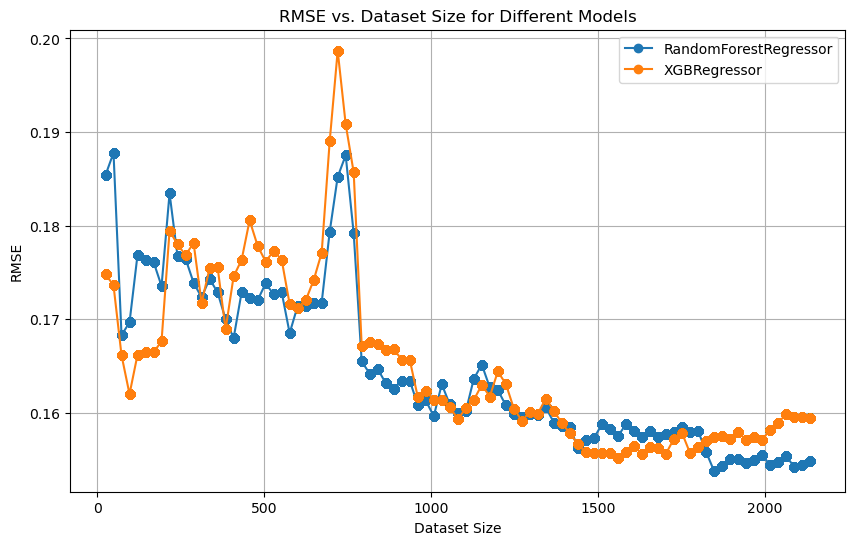

In [3]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

for model_name in pred_true_test_set['Model'].unique():
    subset = pred_true_test_set[pred_true_test_set['Model'] == model_name]
    plt.plot(subset['TrainSize'], subset['RMSE'], marker='o', label=model_name)

plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Dataset Size for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import joblib
"""
This script performs the following operations:
1. Imports necessary libraries: joblib and pandas.
2. Loads a pre-trained scaler from a joblib file.
3. Applies the inverse transformation to the true and predicted electricity consumption values in the test set.
4. Saves the transformed test set to a CSV file.

Functions:
- No functions are defined in this script.

Variables:
- scaler_y_loaded: The loaded scaler object.
- pred_true_test_set: DataFrame containing the true and predicted electricity consumption values.

Filepaths:
- scaler_y_elec.joblib: The file from which the scaler is loaded.
- pred_true_test_set_elec_dataset_size.csv: The file to which the transformed test set is saved.
"""
import pandas as pd
# Load the saved scaler
scaler_y_loaded = joblib.load('scaler_y_elec.joblib')
# Apply inverse transformation to the true and predicted values
pred_true_test_set['True_Electricity Consumption'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['True_Electricity Consumption']])
pred_true_test_set['Pred_Electricity Consumption'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['Pred_Electricity Consumption']])
pred_true_test_set.to_csv('pred_true_test_set_elec_dataset_size.csv', index=False)
pred_true_test_set

,Model,TrainSize,RMSE,True_Electricity Consumption,Pred_Electricity Consumption
0,RandomForestRegressor,24,0.185402,1638.49,1387.086450
1,RandomForestRegressor,24,0.185402,1804.65,1387.086450
2,RandomForestRegressor,24,0.185402,1461.08,1387.086450
3,RandomForestRegressor,24,0.185402,1823.85,1387.086450
4,RandomForestRegressor,24,0.185402,1077.31,1387.086450
...,...,...,...,...,...
59803,XGBRegressor,2136,0.159406,1917.31,853.756535
59804,XGBRegressor,2136,0.159406,2911.67,959.058406
59805,XGBRegressor,2136,0.159406,1599.86,1389.287511
59806,XGBRegressor,2136,0.159406,2448.23,1533.670218


# Temp

In [1]:
import pandas as pd
"""
This script performs the following operations:
1. Imports necessary libraries and modules.
2. Reads a CSV file into a pandas DataFrame.
3. Preprocesses the data using a custom preprocessing function.
4. Combines the training and validation sets.
5. Prints the shapes of the normalized datasets.

Functions:
- preprocess_data: A function imported from FDCS_2_Temp_pre_processing module to preprocess the data.

Variables:
- df: pandas DataFrame containing the data read from the CSV file.
- output_names: List containing the name of the output variable.
- X_train_normalized: Normalized training features.
- y_train_normalized: Normalized training labels.
- X_val_normalized: Normalized validation features.
- y_val_normalized: Normalized validation labels.
- X_test_normalized: Normalized test features.
- y_test_normalized: Normalized test labels.
- X_train_val_normalized: Combined normalized training and validation features.
- y_train_val_normalized: Combined normalized training and validation labels.
"""
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'.csv')

output_names = ['Temperature Closer to Evaporator (C)']

from FDCS_2_Temp_pre_processing import preprocess_data
X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, X_test_normalized, y_test_normalized = preprocess_data(df)

# Combine the training and validation sets directly after they have been recalled
X_train_val_normalized = np.concatenate([X_train_normalized, X_val_normalized], axis=0)
y_train_val_normalized = np.concatenate([y_train_normalized, y_val_normalized], axis=0)

print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of y_train_normalized:", y_train_normalized.shape)
print("Shape of X_val_normalized:", X_val_normalized.shape)
print("Shape of y_val_normalized:", y_val_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test_normalized:", y_test_normalized.shape)
print("Shape of X_train_val_normalized:", X_train_val_normalized.shape)
print("Shape of y_train_val_normalized:", y_train_val_normalized.shape)

Shape of X_train_normalized: (1800, 35)
Shape of y_train_normalized: (1800, 1)
Shape of X_val_normalized: (336, 35)
Shape of y_val_normalized: (336, 1)
Shape of X_test_normalized: (336, 35)
Shape of y_test_normalized: (336, 1)
Shape of X_train_val_normalized: (2136, 35)
Shape of y_train_val_normalized: (2136, 1)


In [2]:
from FDCS_2_models_Dataset_size import run_model
"""
This script runs a model on a normalized test dataset and returns the predictions.

Functions:
    run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names):
        Runs the model using the provided training and test datasets.

Variables:
    pred_true_test_set: The predictions and true values for the test set.

Usage:
    Ensure that the necessary datasets (X_train_val_normalized, y_train_val_normalized, 
    X_test_normalized, y_test_normalized) and output names (output_names) are defined 
    before running this script.
"""
pred_true_test_set = run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names)
pred_true_test_set


Execution time: 568.36 seconds


,Model,TrainSize,RMSE,True_Temperature Closer to Evaporator (C),Pred_Temperature Closer to Evaporator (C)
0,RandomForestRegressor,24,0.199173,0.591281,0.576207
1,RandomForestRegressor,24,0.199173,0.408719,0.576207
2,RandomForestRegressor,24,0.199173,0.386921,0.576207
3,RandomForestRegressor,24,0.199173,0.250681,0.576207
4,RandomForestRegressor,24,0.199173,0.362398,0.576207
...,...,...,...,...,...
59803,XGBRegressor,2136,0.162556,0.634877,0.438961
59804,XGBRegressor,2136,0.162556,0.204360,0.467424
59805,XGBRegressor,2136,0.162556,0.136240,0.462275
59806,XGBRegressor,2136,0.162556,0.226158,0.474700


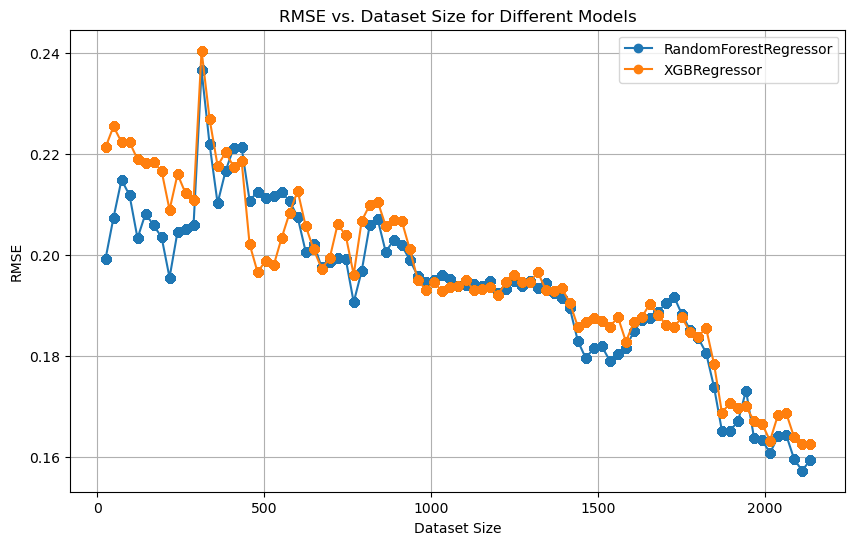

In [5]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

for model_name in pred_true_test_set['Model'].unique():
    subset = pred_true_test_set[pred_true_test_set['Model'] == model_name]
    plt.plot(subset['TrainSize'], subset['RMSE'], marker='o', label=model_name)

plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Dataset Size for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
pred_true_test_set

,Model,TrainSize,RMSE,True_Temperature Closer to Evaporator (C),Pred_Temperature Closer to Evaporator (C)
0,RandomForestRegressor,24,0.199173,0.591281,0.576207
1,RandomForestRegressor,24,0.199173,0.408719,0.576207
2,RandomForestRegressor,24,0.199173,0.386921,0.576207
3,RandomForestRegressor,24,0.199173,0.250681,0.576207
4,RandomForestRegressor,24,0.199173,0.362398,0.576207
...,...,...,...,...,...
59803,XGBRegressor,2136,0.162556,0.634877,0.438961
59804,XGBRegressor,2136,0.162556,0.204360,0.467424
59805,XGBRegressor,2136,0.162556,0.136240,0.462275
59806,XGBRegressor,2136,0.162556,0.226158,0.474700


In [7]:
import joblib
"""
This script loads a pre-trained scaler using joblib and applies an inverse transformation to the true and predicted temperature values 
closer to the evaporator in a test dataset. The transformed values are then saved to a CSV file.

Functions:
    None

Modules:
    joblib: Used for loading the pre-trained scaler.
    pandas (pd): Used for handling the DataFrame operations.

Variables:
    scaler_y_loaded: The pre-trained scaler loaded from 'scaler_y_temp.joblib'.
    pred_true_test_set: DataFrame containing the true and predicted temperature values.

Operations:
    1. Load the pre-trained scaler from 'scaler_y_temp.joblib'.
    2. Apply inverse transformation to the 'True_Temperature Closer to Evaporator (C)' column in the pred_true_test_set DataFrame.
    3. Apply inverse transformation to the 'Pred_Temperature Closer to Evaporator (C)' column in the pred_true_test_set DataFrame.
    4. Save the transformed DataFrame to 'pred_true_test_set_temp_dataset_size.csv'.
    5. Display the transformed DataFrame.
"""
import pandas as pd
# Load the saved scaler
scaler_y_loaded = joblib.load('scaler_y_temp.joblib')
# Apply inverse transformation to the true and predicted values
pred_true_test_set['True_Temperature Closer to Evaporator (C)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['True_Temperature Closer to Evaporator (C)']])
pred_true_test_set['Pred_Temperature Closer to Evaporator (C)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['Pred_Temperature Closer to Evaporator (C)']])
pred_true_test_set.to_csv('pred_true_test_set_temp_dataset_size.csv', index=False)
pred_true_test_set

,Model,TrainSize,RMSE,True_Temperature Closer to Evaporator (C),Pred_Temperature Closer to Evaporator (C)
0,RandomForestRegressor,24,0.199173,10.17,10.114680
1,RandomForestRegressor,24,0.199173,9.50,10.114680
2,RandomForestRegressor,24,0.199173,9.42,10.114680
3,RandomForestRegressor,24,0.199173,8.92,10.114680
4,RandomForestRegressor,24,0.199173,9.33,10.114680
...,...,...,...,...,...
59803,XGBRegressor,2136,0.162556,10.33,9.610987
59804,XGBRegressor,2136,0.162556,8.75,9.715447
59805,XGBRegressor,2136,0.162556,8.50,9.696550
59806,XGBRegressor,2136,0.162556,8.83,9.742151


# Humd

In [1]:
import pandas as pd
"""
This script performs the following tasks:
1. Imports necessary libraries and modules.
2. Reads a CSV file into a pandas DataFrame.
3. Preprocesses the data using a custom preprocessing function.
4. Combines the training and validation sets.
5. Prints the shapes of the normalized training, validation, and test sets.

Functions:
    preprocess_data(df): Preprocesses the input DataFrame and returns normalized training, validation, and test sets.

Variables:
    df (pd.DataFrame): DataFrame containing the data read from the CSV file.
    output_names (list): List containing the names of the output variables.
    X_train_normalized (np.ndarray): Normalized training features.
    y_train_normalized (np.ndarray): Normalized training labels.
    X_val_normalized (np.ndarray): Normalized validation features.
    y_val_normalized (np.ndarray): Normalized validation labels.
    X_test_normalized (np.ndarray): Normalized test features.
    y_test_normalized (np.ndarray): Normalized test labels.
    X_train_val_normalized (np.ndarray): Combined normalized training and validation features.
    y_train_val_normalized (np.ndarray): Combined normalized training and validation labels.
"""
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'.csv')

output_names = ['Humidity Closer to Evaporator (%)']

from FDCS_2_Humd_pre_processing import preprocess_data
X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, X_test_normalized, y_test_normalized = preprocess_data(df)

# Combine the training and validation sets directly after they have been recalled
X_train_val_normalized = np.concatenate([X_train_normalized, X_val_normalized], axis=0)
y_train_val_normalized = np.concatenate([y_train_normalized, y_val_normalized], axis=0)

print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of y_train_normalized:", y_train_normalized.shape)
print("Shape of X_val_normalized:", X_val_normalized.shape)
print("Shape of y_val_normalized:", y_val_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test_normalized:", y_test_normalized.shape)
print("Shape of X_train_val_normalized:", X_train_val_normalized.shape)
print("Shape of y_train_val_normalized:", y_train_val_normalized.shape)

Shape of X_train_normalized: (1800, 35)
Shape of y_train_normalized: (1800, 1)
Shape of X_val_normalized: (336, 35)
Shape of y_val_normalized: (336, 1)
Shape of X_test_normalized: (336, 35)
Shape of y_test_normalized: (336, 1)
Shape of X_train_val_normalized: (2136, 35)
Shape of y_train_val_normalized: (2136, 1)


In [2]:
from FDCS_2_models_Dataset_size import run_model
"""
This script runs a model on a normalized test dataset and returns the predictions.

Functions:
    run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names):
        Runs the model using the provided training and test datasets and returns the predictions.

Variables:
    pred_true_test_set: The predictions returned by the run_model function.

Usage:
    Ensure that the necessary datasets (X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized) 
    and output names (output_names) are defined before running this script.
"""
pred_true_test_set = run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names)
pred_true_test_set

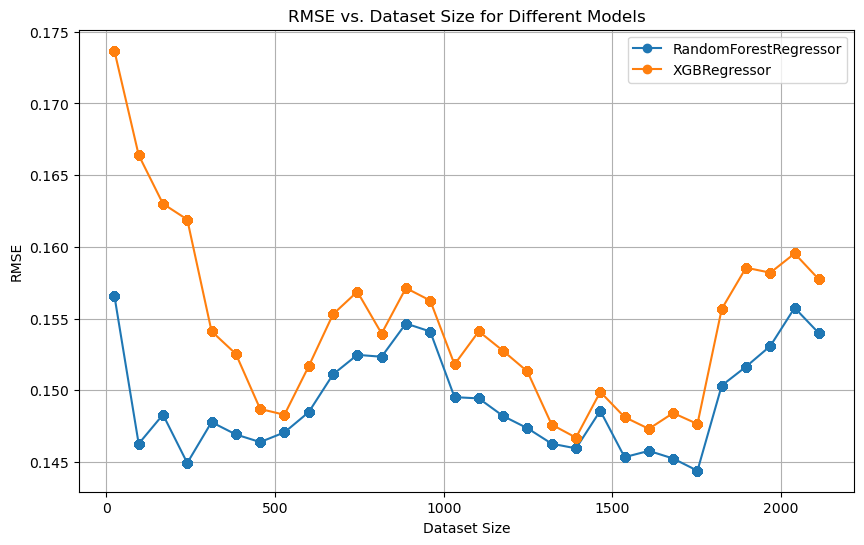

In [ ]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

for model_name in pred_true_test_set['Model'].unique():
    subset = pred_true_test_set[pred_true_test_set['Model'] == model_name]
    plt.plot(subset['TrainSize'], subset['RMSE'], marker='o', label=model_name)

plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Dataset Size for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import joblib
"""
This script performs the following operations:
1. Imports necessary libraries: joblib and pandas.
2. Loads a pre-trained scaler from a file named 'scaler_y_humd.joblib'.
3. Applies the inverse transformation using the loaded scaler to the true and predicted humidity values in the test set.
4. Saves the transformed test set to a CSV file named 'pred_true_test_set_humd_dataset_size.csv'.

Functions:
- joblib.load(filename): Loads a serialized object from the specified file.
- scaler_y_loaded.inverse_transform(data): Applies the inverse transformation to the data using the loaded scaler.
- pred_true_test_set.to_csv(filename, index): Saves the DataFrame to a CSV file without the index.

Variables:
- scaler_y_loaded: The loaded scaler object.
- pred_true_test_set: DataFrame containing the true and predicted humidity values.
"""
import pandas as pd
# Load the saved scaler
scaler_y_loaded = joblib.load('scaler_y_humd.joblib')
# Apply inverse transformation to the true and predicted values
pred_true_test_set['True_Humidity Closer to Evaporator (%)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['True_Humidity Closer to Evaporator (%)']])
pred_true_test_set['Pred_Humidity Closer to Evaporator (%)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['Pred_Humidity Closer to Evaporator (%)']])
pred_true_test_set.to_csv('pred_true_test_set_humd_dataset_size.csv', index=False)
pred_true_test_set

,Model,TrainSize,RMSE,True_Humidity Closer to Evaporator (%),Pred_Humidity Closer to Evaporator (%)
0,RandomForestRegressor,24,0.156431,76.67,74.034221
1,RandomForestRegressor,24,0.156431,71.00,74.034221
2,RandomForestRegressor,24,0.156431,72.58,74.034221
3,RandomForestRegressor,24,0.156431,71.58,74.034221
4,RandomForestRegressor,24,0.156431,71.67,74.034221
...,...,...,...,...,...
59803,XGBRegressor,2136,0.158542,74.67,76.884857
59804,XGBRegressor,2136,0.158542,66.00,76.967000
59805,XGBRegressor,2136,0.158542,66.08,76.477199
59806,XGBRegressor,2136,0.158542,67.58,76.682237


In [6]:
pred_true_test_set.head(50)

,Model,TrainSize,RMSE,True_Humidity Closer to Evaporator (%),Pred_Humidity Closer to Evaporator (%)
0,RandomForestRegressor,24,0.156431,76.67,74.034221
1,RandomForestRegressor,24,0.156431,71.00,74.034221
2,RandomForestRegressor,24,0.156431,72.58,74.034221
3,RandomForestRegressor,24,0.156431,71.58,74.034221
4,RandomForestRegressor,24,0.156431,71.67,74.034221
5,RandomForestRegressor,24,0.156431,74.42,74.034221
6,RandomForestRegressor,24,0.156431,75.08,74.034221
7,RandomForestRegressor,24,0.156431,76.17,74.034221
8,RandomForestRegressor,24,0.156431,76.33,74.034221
9,RandomForestRegressor,24,0.156431,74.50,74.034221
